In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [6]:
#read in dataset
df = pd.read_csv("Cleanedlaptop_df.csv")
df.head(5)

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen_Full HD,Screen_IPS Panel
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,0,1
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,1,0
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,1,0
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,0,1
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,1,0


In [7]:
# Drop the 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

# Display the first few rows to confirm the column has been dropped
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen_Full HD,Screen_IPS Panel
0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,1,0


(0.0, 3974.15)

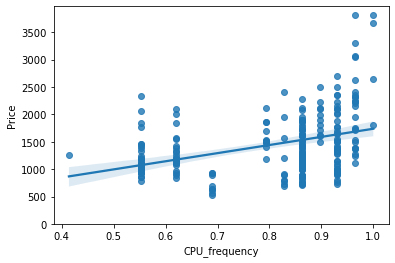

In [8]:
#Task 1 - Visualize individual feature patterns
#Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".
# CPU_frequency plot
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)

(0.0, 3974.15)

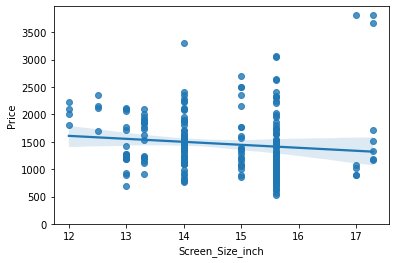

In [9]:
# Screen_Size_inch plot
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)

(0.0, 3974.15)

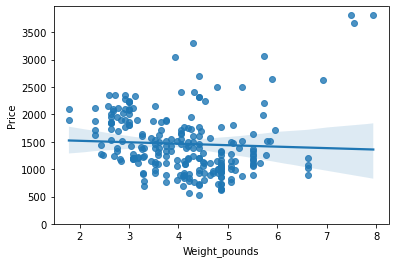

In [10]:
# Weight_pounds plot
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(0,)

In [12]:
# Correlation values of the three attributes with Price
df[['CPU_frequency','Screen_Size_inch','Weight_pounds', 'Price']].corr()

,CPU_frequency,Screen_Size_inch,Weight_pounds,Price
CPU_frequency,1.000000,-0.000955,0.066522,0.366666
Screen_Size_inch,-0.000955,1.000000,0.797605,-0.110565
Weight_pounds,0.066522,0.797605,1.000000,-0.050312
Price,0.366666,-0.110565,-0.050312,1.000000


In [13]:
#Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.

<AxesSubplot:xlabel='Category', ylabel='Price'>

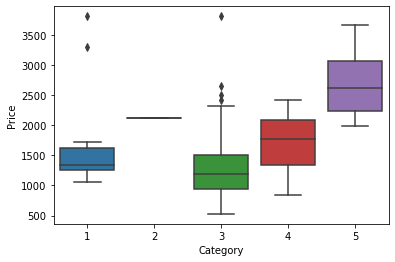

In [14]:
#Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"
# Category Box plot
sns.boxplot(x="Category", y="Price", data=df)

<AxesSubplot:xlabel='GPU', ylabel='Price'>

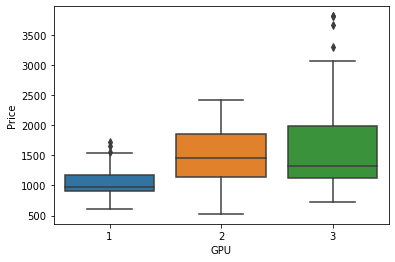

In [15]:
# GPU Box plot
sns.boxplot(x="GPU", y="Price", data=df)

<AxesSubplot:xlabel='OS', ylabel='Price'>

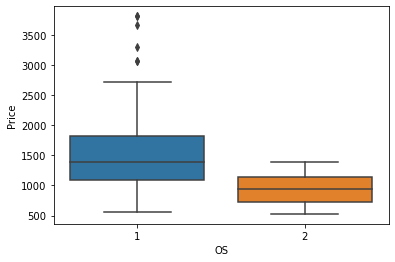

In [16]:
# OS Box plot
sns.boxplot(x="OS", y="Price", data=df)

<AxesSubplot:xlabel='CPU_core', ylabel='Price'>

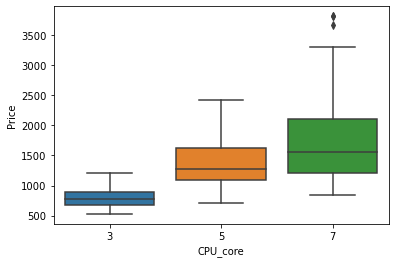

In [17]:
# CPU_core Box plot
sns.boxplot(x="CPU_core", y="Price", data=df)

<AxesSubplot:xlabel='RAM_GB', ylabel='Price'>

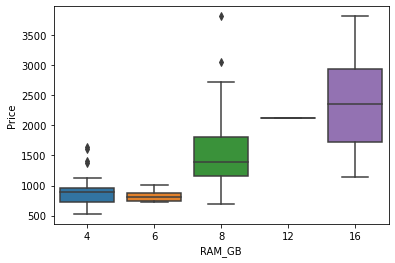

In [18]:
# RAM_GB Box plot
sns.boxplot(x="RAM_GB", y="Price", data=df)

<AxesSubplot:xlabel='Storage_GB_SSD', ylabel='Price'>

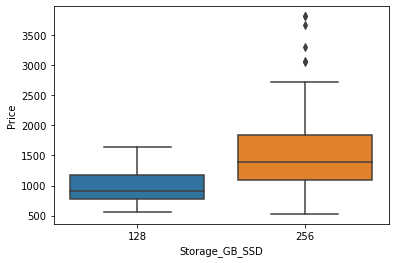

In [19]:
# Storage_GB_SSD Box plot
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)

In [20]:
#Task 2 - Descriptive Statistical Analysis
#Generate the statistical description of all the features being used in the data set. Include "object" data types as well.
print(df.describe())
print(df.describe(include=['object']))

         Category         GPU          OS    CPU_core  Screen_Size_inch  \
count  238.000000  238.000000  238.000000  238.000000        238.000000   
mean     3.205882    2.151261    1.058824    5.630252         14.687951   
std      0.776533    0.638282    0.235790    1.241787          1.165589   
min      1.000000    1.000000    1.000000    3.000000         12.000000   
25%      3.000000    2.000000    1.000000    5.000000         14.000000   
50%      3.000000    2.000000    1.000000    5.000000         15.000000   
75%      4.000000    3.000000    1.000000    7.000000         15.598425   
max      5.000000    3.000000    2.000000    7.000000         17.299213   

       CPU_frequency      RAM_GB  Storage_GB_SSD  Weight_pounds        Price  \
count     238.000000  238.000000      238.000000     238.000000   238.000000   
mean        0.813822    7.882353      245.781513       4.106221  1462.344538   
std         0.141860    2.482603       34.765316       1.078442   574.607699   
min 

In [21]:
#Task 3 - GroupBy and Pivot Tables
#Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.
# Create the group
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [22]:
# Create the Pivot table
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
print(grouped_pivot)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


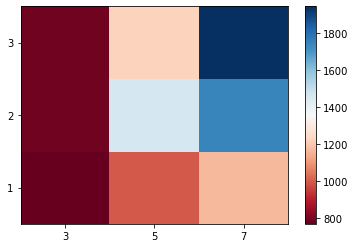

In [23]:
# Create the Plot
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

In [24]:
#Task 4 - Pearson Correlation and p-values
#Use the scipy.stats.pearsonr() function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857841  with a P-value of P = 3.6815606288438424e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency  is 0.36666555892588604  with a P-value of P = 5.5024633507147195e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.2434207552181029  with a P-value of P = 0.00014898923191727792
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11056471275425062  with a P-value of P = 0.0887645673270284
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds  is -0.05031225837751546  with a P-value of P = 0.4397693853434994
CPU_core
The Pearson Correlation Coefficient for  CPU_core  is 0.45939777733551157  with a P-value of P = 7.912950127011088e-14
OS
The Pearson Correlation Coefficient for  OS  is -0.2217298011482738  with a P-value of P = 0.0005696642559248033
GPU
The Pearson Correlation Coefficient for  GPU  is 0.2882981988881428  wi